In [298]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, make_scorer

In [349]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [350]:
covid = pd.read_hdf('./Covid_data/covid_df.hdf')
pop = pd.read_hdf('./Covid_data/population_df.hdf')
covid_per_cap = pd.read_hdf('./Covid_data/covid_per_cap_df.hdf')
ca_sent = pd.read_hdf('./data/processed/ca_sentiment_mean.hdf')

In [351]:
covid_per_cap = covid_per_cap[pd.datetime(2020,3,19):pd.datetime(2020,8,4)]

ca_sent = ca_sent[pd.datetime(2020,3,19):pd.datetime(2020,8,4)]

covid_ca = covid_per_cap[['California_cases', 'California_deaths']]
covid_ca[['California_cases_diff1', 'California_deaths_diff1']] = covid_per_cap[['California_cases', 'California_deaths']].diff()
covid_ca[['California_cases_diff2', 'California_deaths_diff2']] = covid_per_cap[['California_cases', 'California_deaths']].diff().diff()
covid_ca = covid_ca.dropna()

/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [352]:
ca_deaths = covid_per_cap['California_deaths']

ca_deaths_diff_1 = covid_per_cap['California_deaths'].diff(1)

ca_deaths_diff_2 = covid_per_cap['California_deaths'].diff(1).diff(1)

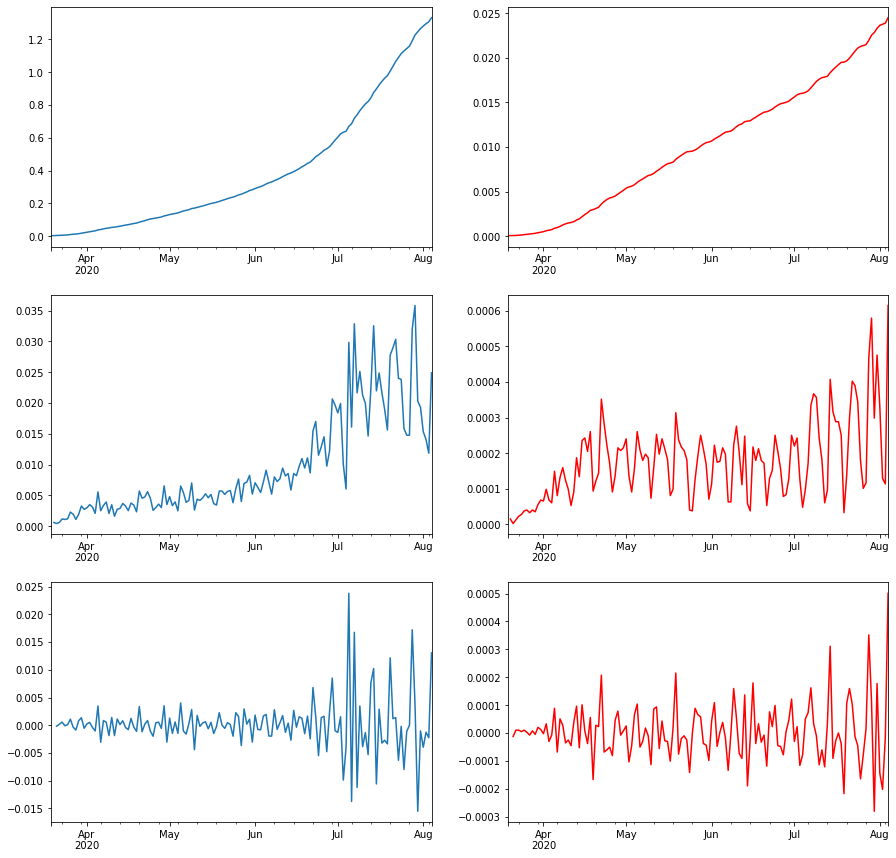

In [353]:
fig =  plt.figure(figsize = (15,15))

fig.add_subplot(3,2,1)
ca_cases.plot()

fig.add_subplot(3,2,3)
ca_cases_diff_1.plot()

fig.add_subplot(3,2,5)
ca_cases_diff_2.plot();

fig.add_subplot(3,2,2)
ca_deaths.plot(color='red')

fig.add_subplot(3,2,4)
ca_deaths_diff_1.plot(color='red')

fig.add_subplot(3,2,6)
ca_deaths_diff_2.plot(color='red');

In [354]:
model_df = pd.concat([ca_sent, covid_ca], axis=1)
model_df = model_df.dropna()

In [355]:
for i in range(6):
    X = model_df[['TB_polarity', 'TB_subjectivity']]
    y = model_df.iloc[:, 2+i]
    lr = LinearRegression()
    lr.fit(X, y)
    y_pred = lr.predict(X)
    print(f'{model_df.columns[2+i]} target var r2 scorer: {r2_score(y, y_pred)}')

California_cases target var r2 scorer: 0.013176293566958375
California_deaths target var r2 scorer: 0.006638017219156023
California_cases_diff1 target var r2 scorer: 0.012412154445643253
California_deaths_diff1 target var r2 scorer: 0.004274491729365892
California_cases_diff2 target var r2 scorer: 0.011017396704760762
California_deaths_diff2 target var r2 scorer: 0.0008469663424742757


# All tweets

In [341]:
covid_per_cap = pd.read_hdf('./Covid_data/covid_per_cap_df.hdf')
ca_sent = pd.read_hdf('./data/processed/ca_sentiment_all.hdf')


In [342]:
covid_per_cap = covid_per_cap[pd.datetime(2020,3,19):pd.datetime(2020,8,4)]

covid_ca = covid_per_cap[['California_cases', 'California_deaths']]
covid_ca[['California_cases_diff1', 'California_deaths_diff1']] = covid_per_cap[['California_cases', 'California_deaths']].diff()
covid_ca[['California_cases_diff2', 'California_deaths_diff2']] = covid_per_cap[['California_cases', 'California_deaths']].diff().diff()
covid_ca = covid_ca.dropna()

ca_sent = ca_sent.iloc[ca_sent.index != pd.datetime(2020,8,5)]
ca_sent = ca_sent.sort_index()

In [343]:
model_df = ca_sent.join(covid_ca, how='outer')

In [344]:
model_df = model_df.drop(columns='all_text')
model_df = model_df.dropna()

In [345]:
model_df.head(100)

,TB_polarity,TB_subjectivity,California_cases,California_deaths,California_cases_diff1,California_deaths_diff1,California_cases_diff2,California_deaths_diff2
2020-03-21,0.350000,0.550000,0.003574,0.000063,0.000428,0.000003,-0.000165,-0.000013
2020-03-21,0.075000,0.525000,0.003574,0.000063,0.000428,0.000003,-0.000165,-0.000013
2020-03-21,0.595313,0.525000,0.003574,0.000063,0.000428,0.000003,-0.000165,-0.000013
2020-03-21,0.000000,0.000000,0.003574,0.000063,0.000428,0.000003,-0.000165,-0.000013
2020-03-21,0.000000,0.650000,0.003574,0.000063,0.000428,0.000003,-0.000165,-0.000013
2020-03-21,0.000000,0.000000,0.003574,0.000063,0.000428,0.000003,-0.000165,-0.000013
2020-03-21,0.000000,0.100000,0.003574,0.000063,0.000428,0.000003,-0.000165,-0.000013
2020-03-21,0.000000,0.000000,0.003574,0.000063,0.000428,0.000003,-0.000165,-0.000013
2020-03-21,0.202344,0.700000,0.003574,0.000063,0.000428,0.000003,-0.000165,-0.000013
2020-03-21,0.000000,0.000000,0.003574,0.000063,0.000428,0.000003,-0.000165,-0.000013


In [348]:
for i in range(6):
    X = model_df[['TB_polarity', 'TB_subjectivity']]
    y = model_df.iloc[:, 2+i]
    lr = LinearRegression()
    lr.fit(X, y)
    y_pred = lr.predict(X)
    print(f'{model_df.columns[2+i]} target var r2 scorer: {r2_score(y, y_pred)}')

California_cases target var r2 scorer: 0.0019005296404257521
California_deaths target var r2 scorer: 0.001794447739337457
California_cases_diff1 target var r2 scorer: 0.0018400606424016086
California_deaths_diff1 target var r2 scorer: 7.41536337373061e-05
California_cases_diff2 target var r2 scorer: 0.0004120661900520739
California_deaths_diff2 target var r2 scorer: 0.0001092947509858666
